# Part II - (Ford Go Bike)


## by (Oyekanmi Susan Omobukola)

## Investigation Overview

To determine trip durations by users based on weekdays,months,minutes ,etc


## Dataset Overview
This data set information contains information about bike rides covering a particular area known as San Francisco Bay


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
new_ford=pd.read_csv('clean_fordgo_bike.csv')
new_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null object
start_hourofday            174952 non-null int64
start_dayofweek            174952 non-null object
start_month                174952 non-null object
end_date                   174952 non-null object
end_hourofday              174952 non-null int64
end_dayofweek              174952 non-null object
end_month                  174952 non-null object
duration_minute            174952 non-null int64
member_age                 174952 non-null int64
dtypes: int64(5), object(11)
memory usage: 21.4+ MB


In [3]:
#datatypes needs to be converted
# correct the start_time datatypes
new_ford['start_date'] = pd.to_datetime(new_ford['start_date'])
# correct the end_time datatype
new_ford['end_date'] = pd.to_datetime(new_ford['end_date'])

In [4]:
#test
# verify changes
new_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
start_station_name         174952 non-null object
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_date                 174952 non-null datetime64[ns]
start_hourofday            174952 non-null int64
start_dayofweek            174952 non-null object
start_month                174952 non-null object
end_date                   174952 non-null datetime64[ns]
end_hourofday              174952 non-null int64
end_dayofweek              174952 non-null object
end_month                  174952 non-null object
duration_minute            174952 non-null int64
member_age                 174952 non-null int64
dtypes: datetime64[ns](2), int64(5), object(9)
memory usage: 21.4+ MB


## (Visualization 1)

Subscribers uses bike more than customers

Text(0.5,1,'total bike count')

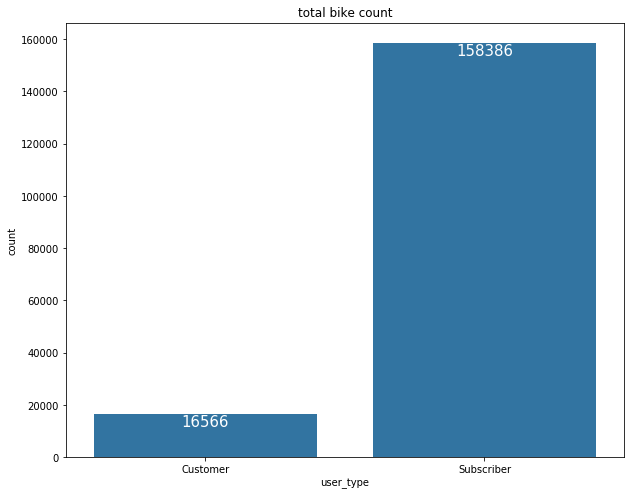

In [5]:
plt.figure(figsize=[10,8])     
base_color = sn.color_palette()[0]
ax = sn.countplot(data=new_ford, x ='user_type', color=base_color)
# add annotations
n_points = new_ford.shape[0]
user_counts = new_ford['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for counts, user in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = user_counts[user.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(counts, count-8, pct_string, va='top', ha='center', color = 'w', fontsize=15)
plt.title('total bike count')

## (Visualization 2)

All trip was made in February

Text(0.5,1,'Bike ride count during months ')

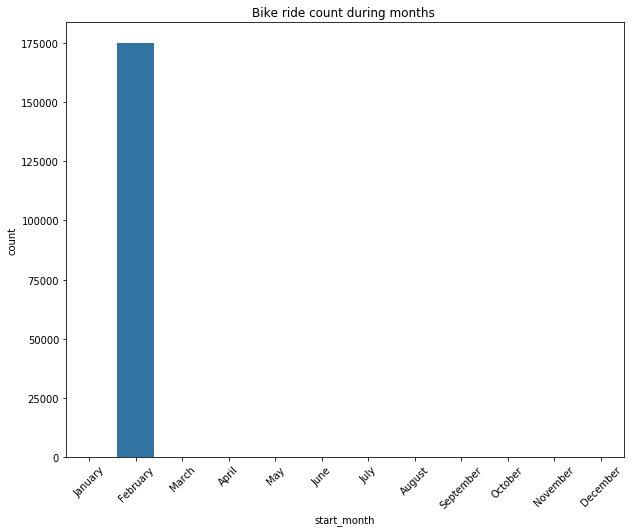

In [6]:
plt.figure(figsize=[10,8])
plt.xticks(rotation=45)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
sn.countplot(data=new_ford, x='start_month', color=base_color, order = months)
plt.title("Bike ride count during months ")

## (Visualization 3)

The most important stations are Market St at 10th St station & San Francisco while the stations that arent of relevance are the

16th depot and the 21st Ave & Willow St


Text(0.5,1,'Descending order of Start station count')

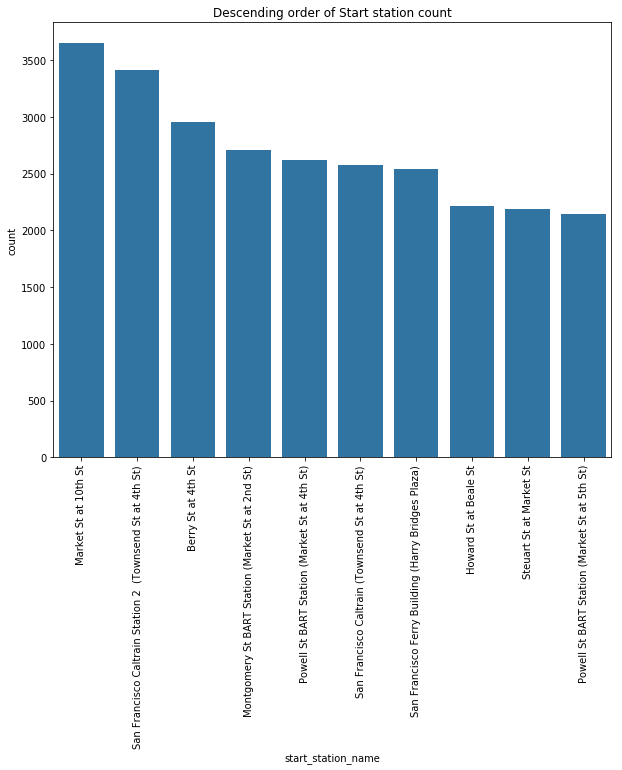

In [7]:
#plotting the graph to determine the most busy start station  
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
plt.xticks(rotation=90)
#to arrange the start station in descending order
Station_order=new_ford['start_station_name'].value_counts()[:10].index
sn.countplot(data=new_ford,x='start_station_name',color=base_color,order=Station_order)
plt.title('Descending order of Start station count')

(Visualization 4)

Most people within the mean age of over 37.2 have a longer trip duration than people with older age


Text(0.5,1,'Age VS Duration')

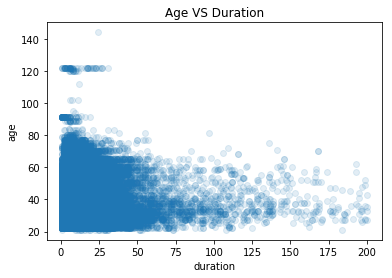

In [8]:
df1 = new_ford[new_ford["duration_minute"] <= 200]
plt.scatter(data = df1, y = 'member_age', x = 'duration_minute', alpha = 1/8)
plt.ylabel('age')
plt.xlabel('duration')
plt.title("Age VS Duration")

(Visualization 5)

customers have a longer trip durations than that of the subsribers ,the mean of the

customers is greater than that of the subscriber

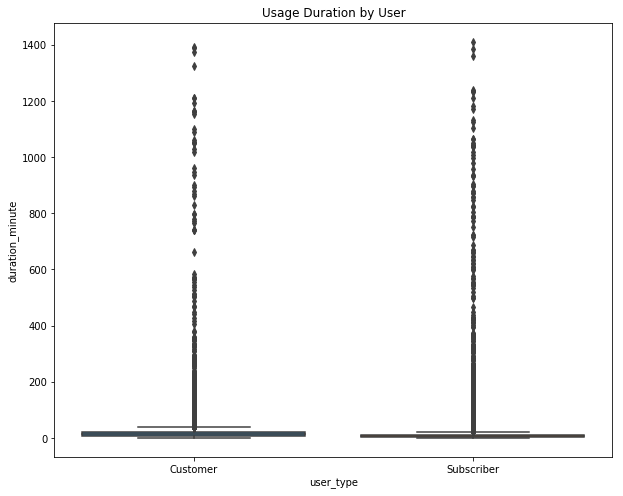

In [9]:
customer = new_ford['user_type']=='Customer'
subscriber = new_ford['user_type']=='Subscriber'
#Average trip duration for  customer
new_ford[customer].duration_minute.mean()
# Average trip duration for Subscriber/Membe
new_ford[subscriber].duration_minute.mean()
plt.figure(figsize=[10,8])
plt.title('Usage Duration by User')
sn.boxplot(data=new_ford, x='user_type', y='duration_minute')

(Visualization 6)

Trip duration is longer during weekends most especially sundays which might be due to partis ,events ,church

Text(0.5,1,'Weekly Trip Duration')

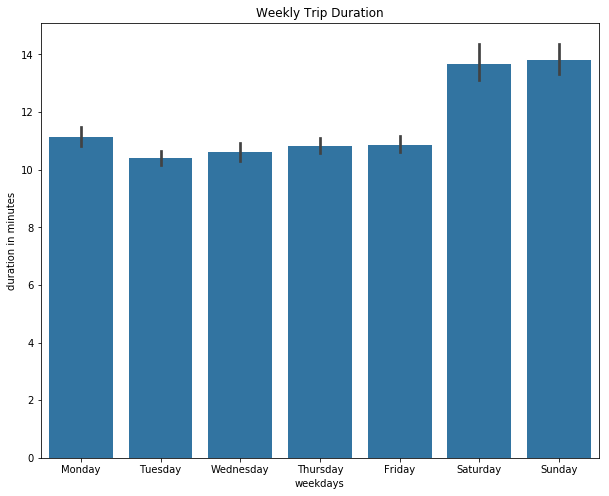

In [10]:
base_color=sn.color_palette()[0]
plt.figure(figsize=[10,8])
ty= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sn.barplot(data=new_ford,x='start_dayofweek',y ='duration_minute',color=base_color,order=ty)
plt.xlabel('weekdays')
plt.ylabel('duration in minutes')
plt.title('Weekly Trip Duration')

(Visualization 7)

Customers have longer trip durations at 3am


Text(0.5,1,'Trip distribution overday hours and by customer type')

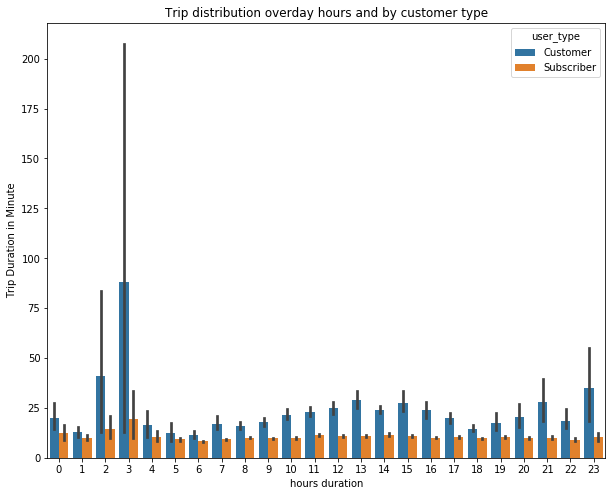

In [11]:
plt.figure(figsize = [10,8])
sn.barplot(data = new_ford, x = "start_hourofday", y = "duration_minute", hue='user_type')
plt.xlabel('hours duration');
plt.ylabel('Trip Duration in Minute')
plt.title("Trip distribution overday hours and by customer type")

In [ ]:

!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt